# Arpita singh

# Objective:
Developed a model to predict stock prices using historical data.

Approach:
Collected and prepared a dataset containing stock prices.
Utilized linear regression, a simple yet effective model for prediction.
 

In [78]:
import pandas as pd #importing laibraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df=pd.read_csv(r"C:\Users\ARPITA SINGH\Desktop\JIOFIN.NS.csv")#reading data

In [80]:
df.head(2) #some parts of data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-21,262.000000,262.049988,248.899994,248.899994,248.899994,74715306.0
1,2023-08-22,236.449997,236.449997,236.449997,236.449997,236.449997,7281398.0


In [81]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       146 non-null    object 
 1   Open       145 non-null    float64
 2   High       145 non-null    float64
 3   Low        145 non-null    float64
 4   Close      145 non-null    float64
 5   Adj Close  145 non-null    float64
 6   Volume     145 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB


In [82]:
df.isnull().sum() #to check the null value in data

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [83]:
df.dropna(inplace=True)
# handling null value in data

In [84]:
df.isnull().sum() #to verify and checking 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [85]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)#changing datatype

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


In [86]:
#to modify the column name
df.rename(columns={'Close': 'Closing Price'}, inplace=True)


In [87]:
df.describe()#calculating statistics 

,Open,High,Low,Closing Price,Adj Close,Volume
count,145.000000,145.000000,145.000000,145.000000,145.000000,1.450000e+02
mean,251.170345,255.804137,246.938621,250.794482,250.794482,3.690250e+07
std,37.935470,40.351549,36.171077,37.989843,37.989843,4.378894e+07
min,202.800003,211.800003,202.800003,206.600006,206.600006,4.289046e+06
25%,225.899994,227.850006,223.699997,225.100006,225.100006,1.339215e+07
50%,240.000000,242.600006,236.449997,239.399994,239.399994,2.140317e+07
75%,256.950012,262.049988,253.000000,255.050003,255.050003,4.385683e+07
max,363.700012,374.500000,358.750000,361.850006,361.850006,2.810401e+08


In [88]:
# checking unique value
df.nunique().sort_values()

Open             127
Closing Price    136
Adj Close        136
High             137
Low              137
Date             145
Volume           145
dtype: int64

In [89]:
# check duplicated  value
df.duplicated().sum()

0

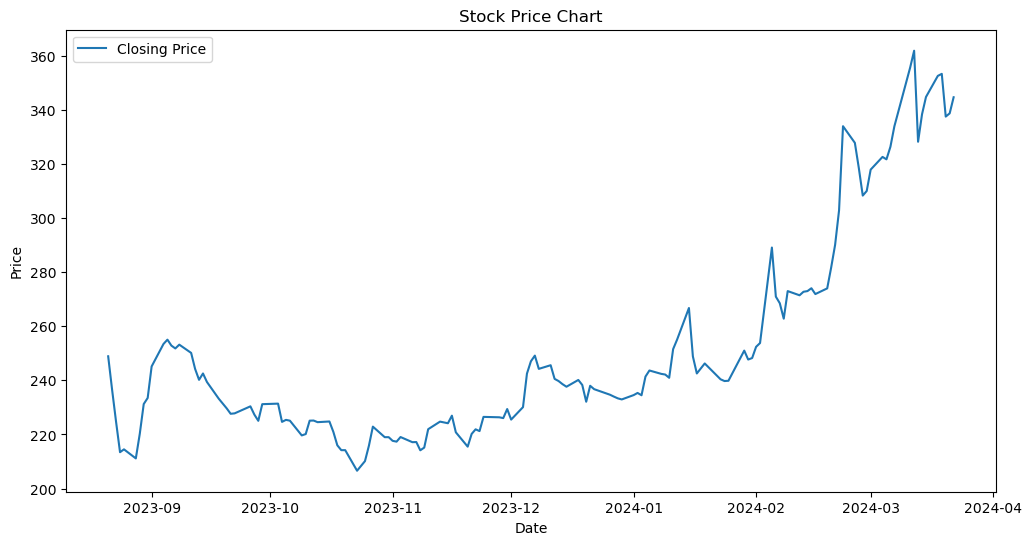

In [90]:
# plotting the stock data chart
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')
plt.title('Stock Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()



Text(0.5, 1.0, 'The relation between Date of High & low Value')

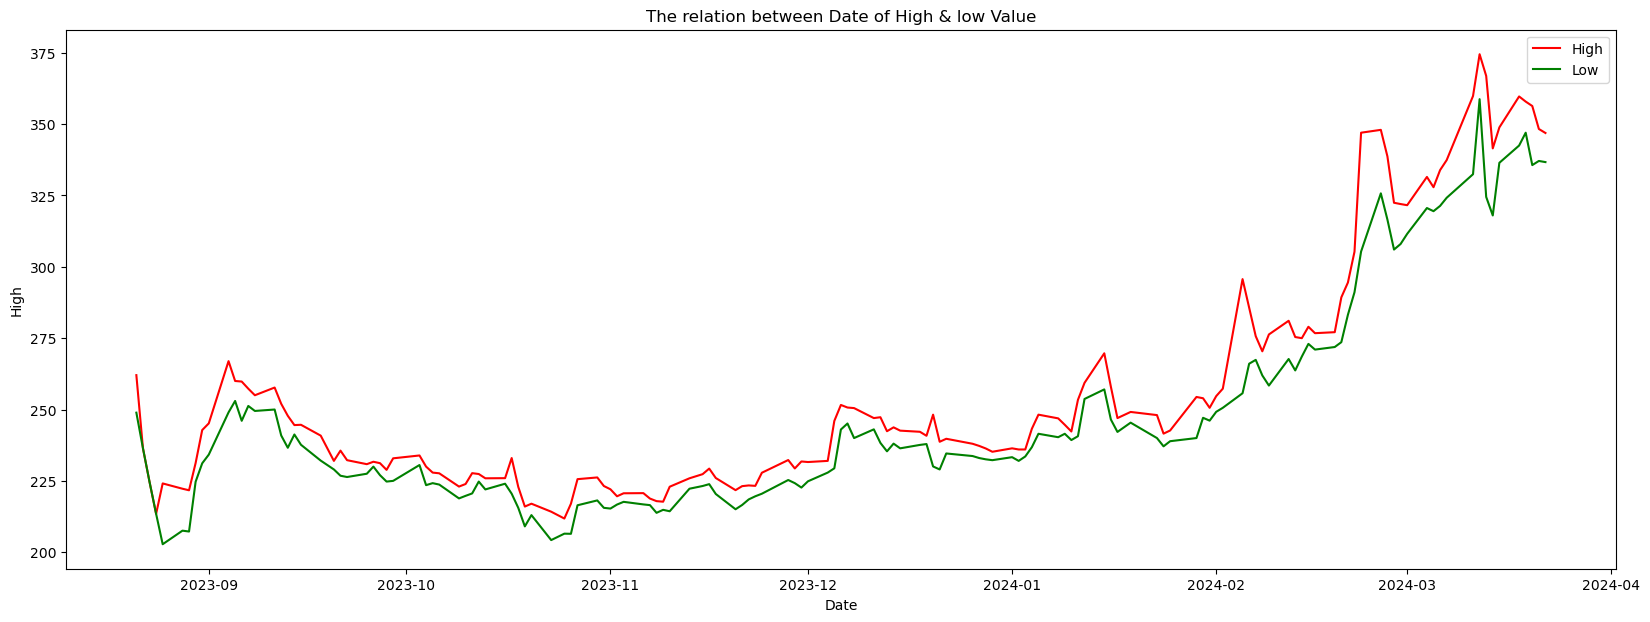

In [91]:
# show the relation between Date of High & Low value
import seaborn as sns
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Date",y="High",color="red",label="High")
sns.lineplot(data=df,x="Date",y="Low",color="green",label="Low")

plt.title("The relation between Date of High & low Value")

Text(0.5, 1.0, 'The relation between  Date of Open & Close value')

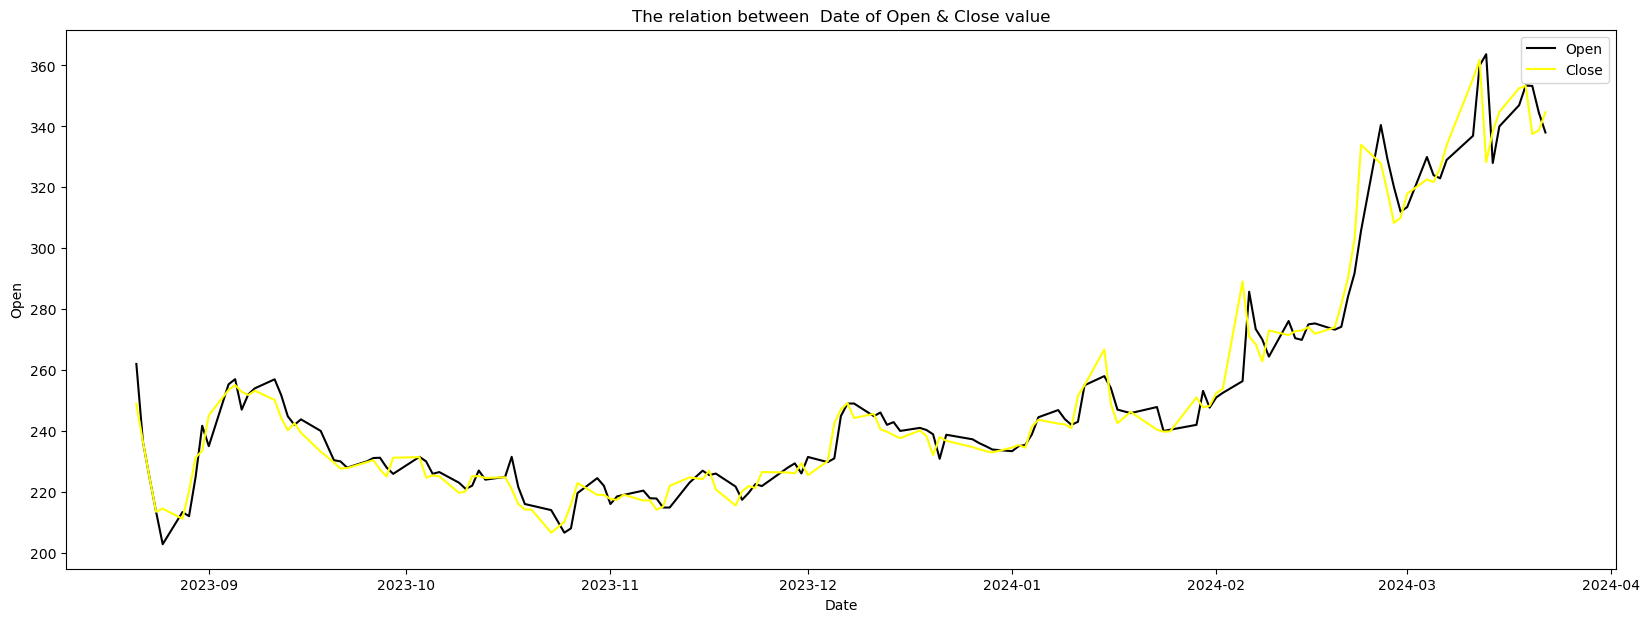

In [92]:
# show the relation between Date of Open & Close value
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Date",y="Open",color="black",label="Open")
sns.lineplot(data=df,x="Date",y="Closing Price",color="yellow",label="Close")

plt.title("The relation between  Date of Open & Close value")

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']] #Independent variable
y = df['Closing Price']#Dependent Variable

In [95]:
# Spliting  the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
X_train.head()


,Open,High,Low,Adj Close,Volume
9,235.000000,245.149994,234.199997,245.149994,39481020.0
4,202.800003,224.100006,202.800003,214.500000,281040100.0
26,231.199997,231.199997,227.000000,227.350006,10984320.0
121,275.299988,276.750000,271.000000,271.899994,14337050.0
126,305.799988,347.000000,305.350006,333.950012,270077100.0


In [97]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [98]:
y_pred = model.predict(X_test)#predicting the model

In [99]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.790819177367702e-19
R-squared: 1.0


In [100]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the Mean Squared Error (MSE) scores
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


Mean MSE: 6.44462780263402e-20
Standard Deviation of MSE: 5.121403369986598e-20


# Results:
Achieved high accuracy: low Mean Squared Error (MSE) and perfect R-squared value (1.0).
Cross-validation confirmed model's generalization ability.
Implications:

Linear regression model demonstrates strong predictive power.
Further exploration of alternative models and feature engineering may enhance predictions.
External factors should be considered for comprehensive stock price prediction.
Next Steps:

Explore alternative models and feature engineering techniques.
Consider external factors to improve prediction accuracy.

Conclusion:
Model shows promise for predicting stock prices accurately based on historical data.
Continued refinement and exploration could lead to even better predictions.
This project successfully developed a model using historical stock data to predict future prices with high accuracy